In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [73]:
BFGS_Loss = []
Adam_Loss = []
isAdam = True

In [74]:
with open('loss_curve.txt','rb') as f:
    seg_BFGS_Loss = []
    seg_Adam_Loss = []
    for lines in f:
        Loss_loc = lines.find(b', Loss:')+7
        next_comma_loc = lines[Loss_loc:].find(b',')+Loss_loc
        tmp_loss = float(lines[Loss_loc:next_comma_loc])
        if lines[:3]==b'It:':#adam loss
            if not isAdam:#switching from BFGC to adam
                BFGS_Loss.append(seg_BFGS_Loss)
                seg_BFGS_Loss = []
                seg_Adam_Loss = []
            seg_Adam_Loss.append(tmp_loss)
            isAdam = True
        else: #BFGS loss
            if isAdam:#switching from adam to BFGS
                Adam_Loss.append(seg_Adam_Loss)
                seg_BFGS_Loss = []
                seg_Adam_Loss = []
            seg_BFGS_Loss.append(tmp_loss)
            isAdam = False
    BFGS_Loss.append(seg_BFGS_Loss)


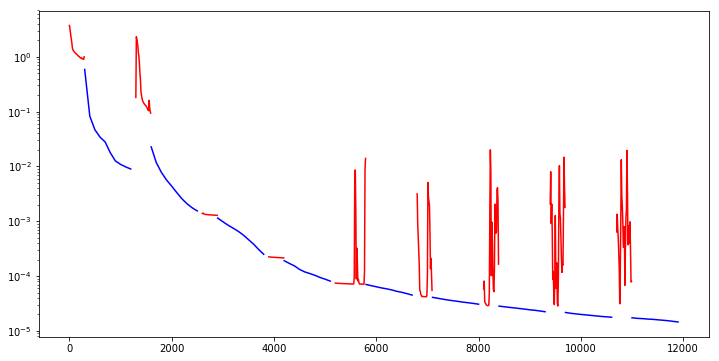

In [81]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

Iter = 0
for i, AL in enumerate(Adam_Loss):
    iend = 10*len(AL)+Iter
    plt.plot(np.arange(Iter,iend,10),AL,'r-')
    
    BL = BFGS_Loss[i]
    
    Iter = iend
    iend = 100*len(BL)+Iter
    plt.plot(np.arange(Iter,iend,100),BL,'b-')

    Iter = iend

ax.set_yscale('log')


In [11]:
Loss_loc

12

In [12]:
next_comma_loc

22

In [16]:
float(lines[Loss_loc:next_comma_loc])

3.728

In [31]:
lines[:3]==b'Ite'

True

In [55]:
not isAdam

True